In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# Einlesen der Daten
data = pd.read_csv("umfragedaten_v1_an-1636985768.csv")
data.head()

,ID,GESCHL,GEBJAHR,BERUFSTAETIG,ARBEITSSTD,ARZTBES,RAUCH,GRO,GEW,SCHULABSCHLUSS,SCHULABSCHLUSS_V,SCHULABSCHLUSS_M,HOE_ABSCHLUSS,HOE_ABSCHLUSS_V,HOE_ABSCHLUSS_M,NETTO,ZUFR
0,1359,WEIBLICH,1967.0,NICHT ERWERBSTAETIG,NaN,1.0,JA,162.0,79.0,MITTLERE REIFE,MITTLERE REIFE,HOCHSCHULREIFE,LEHRE,"GEWERBL.,LANDW.LEHRE","MEISTER, TECHNIKER",475.0,10.0
1,2455,WEIBLICH,1964.0,HAUPTBERUFL.HALBTAGS,30.0,1.0,NEIN,165.0,59.0,MITTLERE REIFE,"VOLKS-,HAUPTSCHULE","VOLKS-,HAUPTSCHULE",LEHRE,"MEISTER, TECHNIKER",KAUFMAENNISCHE LEHRE,780.0,9.0
2,200,MAENNLICH,1980.0,NICHT ERWERBSTAETIG,NaN,3.0,NEIN,166.0,86.0,HOCHSCHULREIFE,HOCHSCHULREIFE,HOCHSCHULREIFE,HOCHSCHULABSCHLUSS,HOCHSCHULABSCHLUSS,HOCHSCHULABSCHLUSS,NaN,8.0
3,1280,MAENNLICH,1968.0,HAUPTBERUFL.GANZTAGS,50.0,0.0,NEIN,180.0,95.0,FACHHOCHSCHULREIFE,MITTLERE REIFE,MITTLERE REIFE,FACHHOCHSCHULABSCHL.,KAUFMAENNISCHE LEHRE,KAUFMAENNISCHE LEHRE,NaN,8.0
4,2384,WEIBLICH,1995.0,NICHT ERWERBSTAETIG,NaN,1.0,NEIN,161.0,46.0,NOCH SCHUELER,MITTLERE REIFE,"VOLKS-,HAUPTSCHULE",NOCH SCHUELER,"GEWERBL.,LANDW.LEHRE","GEWERBL.,LANDW.LEHRE",NaN,7.0


In [3]:
# Raucherwerte zu 1 und 0 verarbeiten
data["RAUCH"] = data["RAUCH"].map({"NEIN":0, "JA":1})
data.head()

,ID,GESCHL,GEBJAHR,BERUFSTAETIG,ARBEITSSTD,ARZTBES,RAUCH,GRO,GEW,SCHULABSCHLUSS,SCHULABSCHLUSS_V,SCHULABSCHLUSS_M,HOE_ABSCHLUSS,HOE_ABSCHLUSS_V,HOE_ABSCHLUSS_M,NETTO,ZUFR
0,1359,WEIBLICH,1967.0,NICHT ERWERBSTAETIG,NaN,1.0,1.0,162.0,79.0,MITTLERE REIFE,MITTLERE REIFE,HOCHSCHULREIFE,LEHRE,"GEWERBL.,LANDW.LEHRE","MEISTER, TECHNIKER",475.0,10.0
1,2455,WEIBLICH,1964.0,HAUPTBERUFL.HALBTAGS,30.0,1.0,0.0,165.0,59.0,MITTLERE REIFE,"VOLKS-,HAUPTSCHULE","VOLKS-,HAUPTSCHULE",LEHRE,"MEISTER, TECHNIKER",KAUFMAENNISCHE LEHRE,780.0,9.0
2,200,MAENNLICH,1980.0,NICHT ERWERBSTAETIG,NaN,3.0,0.0,166.0,86.0,HOCHSCHULREIFE,HOCHSCHULREIFE,HOCHSCHULREIFE,HOCHSCHULABSCHLUSS,HOCHSCHULABSCHLUSS,HOCHSCHULABSCHLUSS,NaN,8.0
3,1280,MAENNLICH,1968.0,HAUPTBERUFL.GANZTAGS,50.0,0.0,0.0,180.0,95.0,FACHHOCHSCHULREIFE,MITTLERE REIFE,MITTLERE REIFE,FACHHOCHSCHULABSCHL.,KAUFMAENNISCHE LEHRE,KAUFMAENNISCHE LEHRE,NaN,8.0
4,2384,WEIBLICH,1995.0,NICHT ERWERBSTAETIG,NaN,1.0,0.0,161.0,46.0,NOCH SCHUELER,MITTLERE REIFE,"VOLKS-,HAUPTSCHULE",NOCH SCHUELER,"GEWERBL.,LANDW.LEHRE","GEWERBL.,LANDW.LEHRE",NaN,7.0


In [4]:
# NA Werte Zeilen entfernen
data = data[data["RAUCH"].notna()]
data = data[data["NETTO"].notna()]
data.head()

,ID,GESCHL,GEBJAHR,BERUFSTAETIG,ARBEITSSTD,ARZTBES,RAUCH,GRO,GEW,SCHULABSCHLUSS,SCHULABSCHLUSS_V,SCHULABSCHLUSS_M,HOE_ABSCHLUSS,HOE_ABSCHLUSS_V,HOE_ABSCHLUSS_M,NETTO,ZUFR
0,1359,WEIBLICH,1967.0,NICHT ERWERBSTAETIG,NaN,1.0,1.0,162.0,79.0,MITTLERE REIFE,MITTLERE REIFE,HOCHSCHULREIFE,LEHRE,"GEWERBL.,LANDW.LEHRE","MEISTER, TECHNIKER",475.0,10.0
1,2455,WEIBLICH,1964.0,HAUPTBERUFL.HALBTAGS,30.0,1.0,0.0,165.0,59.0,MITTLERE REIFE,"VOLKS-,HAUPTSCHULE","VOLKS-,HAUPTSCHULE",LEHRE,"MEISTER, TECHNIKER",KAUFMAENNISCHE LEHRE,780.0,9.0
6,837,MAENNLICH,1967.0,HAUPTBERUFL.GANZTAGS,47.0,0.0,0.0,194.0,96.0,ANDERER ABSCHLUSS,"VOLKS-,HAUPTSCHULE","VOLKS-,HAUPTSCHULE","MEISTER, TECHNIKER","GEWERBL.,LANDW.LEHRE",KEIN ABSCHLUSS,4000.0,8.0
7,1343,MAENNLICH,1989.0,NEBENHER BERUFSTAE.,NaN,1.0,0.0,173.0,70.0,"VOLKS-,HAUPTSCHULE",OHNE ABSCHLUSS,OHNE ABSCHLUSS,KEIN ABSCHLUSS,KEIN ABSCHLUSS,KAUFMAENNISCHE LEHRE,400.0,9.0
8,3129,MAENNLICH,1960.0,HAUPTBERUFL.GANZTAGS,37.0,0.0,0.0,175.0,85.0,"VOLKS-,HAUPTSCHULE","VOLKS-,HAUPTSCHULE","VOLKS-,HAUPTSCHULE",LEHRE,"GEWERBL.,LANDW.LEHRE",KAUFMAENNISCHE LEHRE,1100.0,8.0


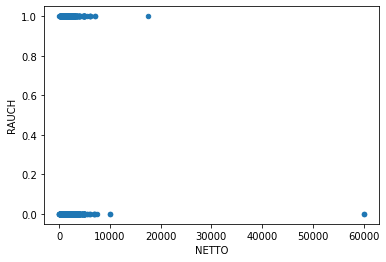

In [5]:
# Scatterplot erstellen fuer Netto und Raucher
data.plot.scatter("NETTO", "RAUCH")
plt.show()

In [ ]:
# Trainingsdaten erstellen
x_train, x, y_train, y =

In [10]:
x = data["RAUCH"].values.reshape(-1,1)
y = data["NETTO"].values
model = LogisticRegression().fit(x, y)
parameter = model.coef_
#print(parameter)

LogisticRegression()
